In [1]:
#Load the Fashion-MNIST dataset
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


#Print the shape of the training and testing data
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


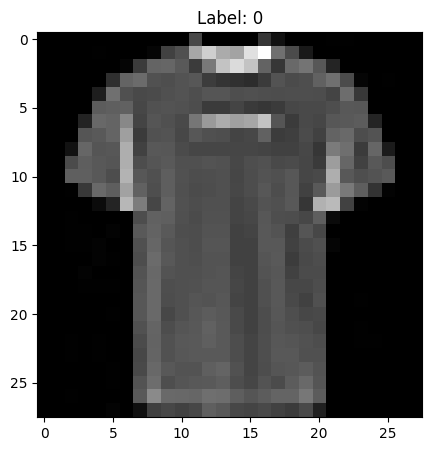

In [4]:
#Visualize some of the images from the dataset
import matplotlib.pyplot as plt

imgIndex = 187

plt.figure(figsize=(10,5))

plt.imshow(X_train[imgIndex], cmap='gray')
plt.title(f"Label: {y_train[imgIndex]}")
plt.show()

In [ ]:
## Flatten the 28x28 images into 784-dimensional vectors
X_train_reshaped = X_train.reshape(60000, 784)
X_test_reshaped = X_test.reshape(10000, 784)


In [6]:
## Scale the data using min-max scaling to the range [0, 1]
X_train_scaled = (X_train_reshaped - 0) / (255.0 - 0)
X_test_scaled = (X_test_reshaped - 0) / (255.0 - 0)

In [7]:
## Define model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

#Define model architecture
model = Sequential()

number_of_classes = 10

#Input layer
model.add(Input(shape=(X_train_scaled.shape[1],)))

# Hidden layer 1
model.add(Dense(256, activation='relu'))

# Hidden layer 2
model.add(Dense(128, activation='relu'))

# Hidden layer 3
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(number_of_classes, activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8226 - loss: 0.4926 - val_accuracy: 0.8508 - val_loss: 0.4084
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8667 - loss: 0.3654 - val_accuracy: 0.8616 - val_loss: 0.3901
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8796 - loss: 0.3275 - val_accuracy: 0.8617 - val_loss: 0.3940
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8855 - loss: 0.3071 - val_accuracy: 0.8775 - val_loss: 0.3396
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8906 - loss: 0.2919 - val_accuracy: 0.8703 - val_loss: 0.3681
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8977 - loss: 0.2729 - val_accuracy: 0.8798 - val_loss: 0.3353
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9006 - loss: 0.2619 - val_accuracy: 0.8801 - val_loss: 0.3435
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9057 - los

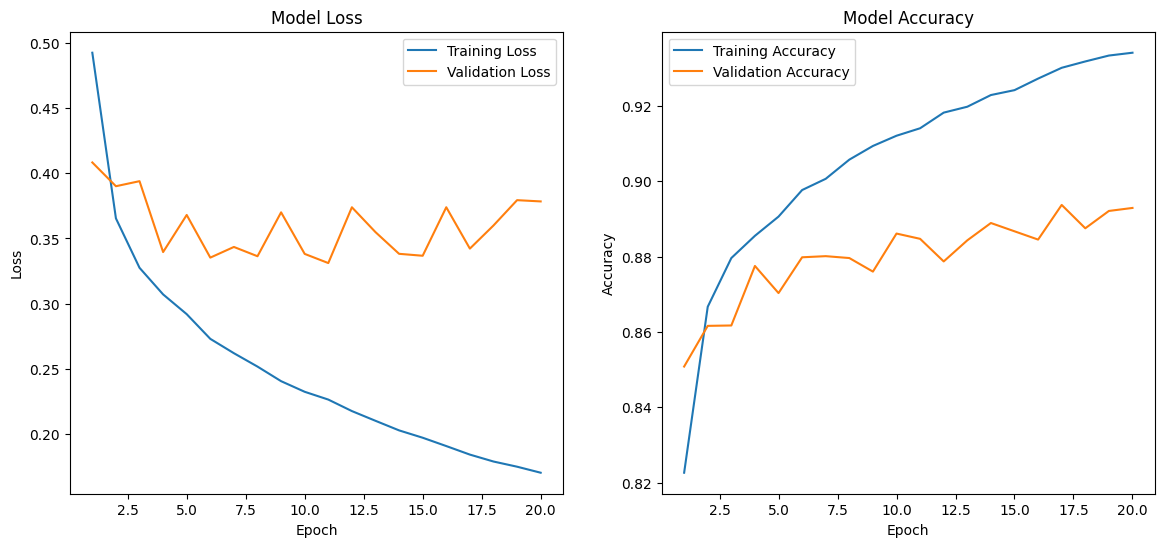

In [11]:
## Define a function to visualize training losses
def plot_training_history(history,epochs=20):
    plt.figure(figsize=(14, 6))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), history.history['loss'], label='Training Loss')
    plt.plot(range(1, epochs + 1), history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), history.history['accuracy'], label='Training Accuracy')
    plt.plot(range(1, epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)

## Regularization: Dropout

In [15]:
## Regularization and Dropout can be added to improve model performance and reduce overfitting.
## Experiment with different architectures, activation functions, and optimizers to further enhance performance.

from tensorflow.keras.layers import Dropout
## Define model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

#Define model architecture
model = Sequential()

number_of_classes = 10

#Input layer
model.add(Input(shape=(X_train_scaled.shape[1],)))

# Hidden layer 1
model.add(Dense(256, activation='relu'))

# Add dropout
model.add(Dropout(0.2))

# Hidden layer 2
model.add(Dense(128, activation='relu'))

# Hidden layer 3
model.add(Dense(64, activation='relu'))

# Add dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(number_of_classes, activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# train the model
history = model.fit(X_train_scaled,y_train, epochs= 10, batch_size = 32,
                   validation_data = (X_test_scaled,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7964 - loss: 0.5641 - val_accuracy: 0.8433 - val_loss: 0.4276
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8498 - loss: 0.4175 - val_accuracy: 0.8487 - val_loss: 0.4053
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8607 - loss: 0.3839 - val_accuracy: 0.8529 - val_loss: 0.4028
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8693 - loss: 0.3586 - val_accuracy: 0.8705 - val_loss: 0.3499
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8767 - loss: 0.3407 - val_accuracy: 0.8725 - val_loss: 0.3522
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8794 - loss: 0.3291 - val_accuracy: 0.8738 - val_loss: 0.3410
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8831 - loss: 0.3188 - val_accuracy: 0.8749 - val_loss: 0.3515
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8847 - los

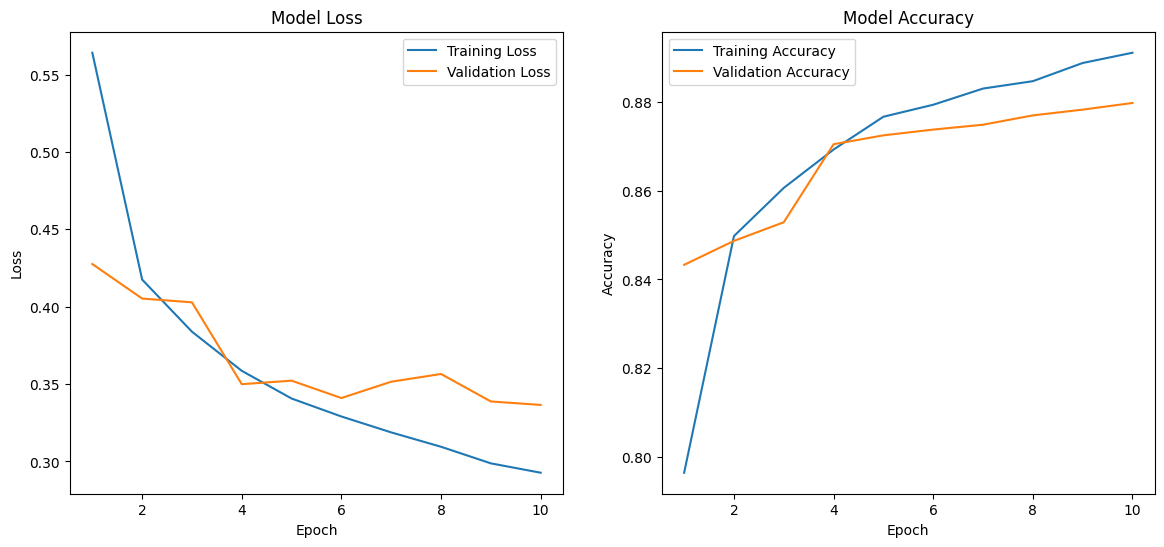

In [17]:
plot_training_history(history,epochs=10)

## Regularization: L1 and L2 Penalities

In [19]:
## Regularization and Dropout can be added to improve model performance and reduce overfitting.
## Experiment with different architectures, activation functions, and optimizers to further enhance performance.

from tensorflow.keras.layers import Dropout
## Define model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import L1, L2 
#Define model architecture
model = Sequential()

number_of_classes = 10

#Input layer
model.add(Input(shape=(X_train_scaled.shape[1],)))

# Hidden layer 1
model.add(Dense(256, activation='relu', kernel_regularizer=L2(0.01)))

# Hidden layer 2
model.add(Dense(128, activation='relu', kernel_regularizer=L2(0.01)))

# Hidden layer 3
model.add(Dense(64, activation='relu', kernel_regularizer=L2(0.01)))

# Output layer
model.add(Dense(number_of_classes, activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7753 - loss: 1.2487 - val_accuracy: 0.7868 - val_loss: 0.8465
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8040 - loss: 0.7737 - val_accuracy: 0.8011 - val_loss: 0.7500
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 18ms/step - accuracy: 0.8153 - loss: 0.7118 - val_accuracy: 0.7917 - val_loss: 0.7594
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8201 - loss: 0.6789 - val_accuracy: 0.8220 - val_loss: 0.6887
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8254 - loss: 0.6552 - val_accuracy: 0.8278 - val_loss: 0.6444
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8279 - loss: 0.6405 - val_accuracy: 0.8234 - val_loss: 0.6550
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8319 - loss: 0.6255 - val_accuracy: 0.8278 - val_loss: 0.6426
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8331 -

ValueError: x and y must have same first dimension, but have shapes (20,) and (10,)

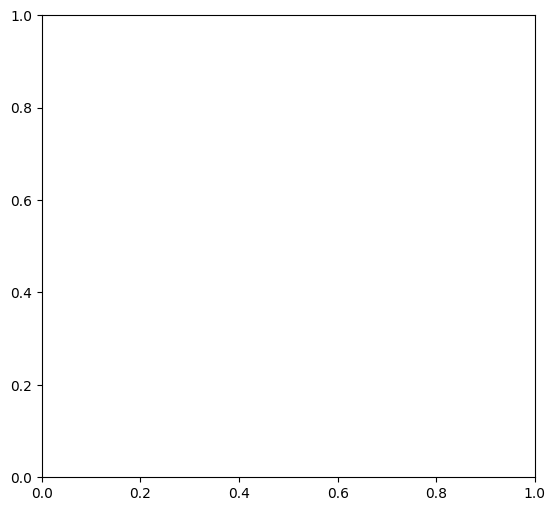

In [ ]:
# train the model
history = model.fit(X_train_scaled,y_train, epochs= 10, batch_size = 32,
                   validation_data = (X_test_scaled,y_test))



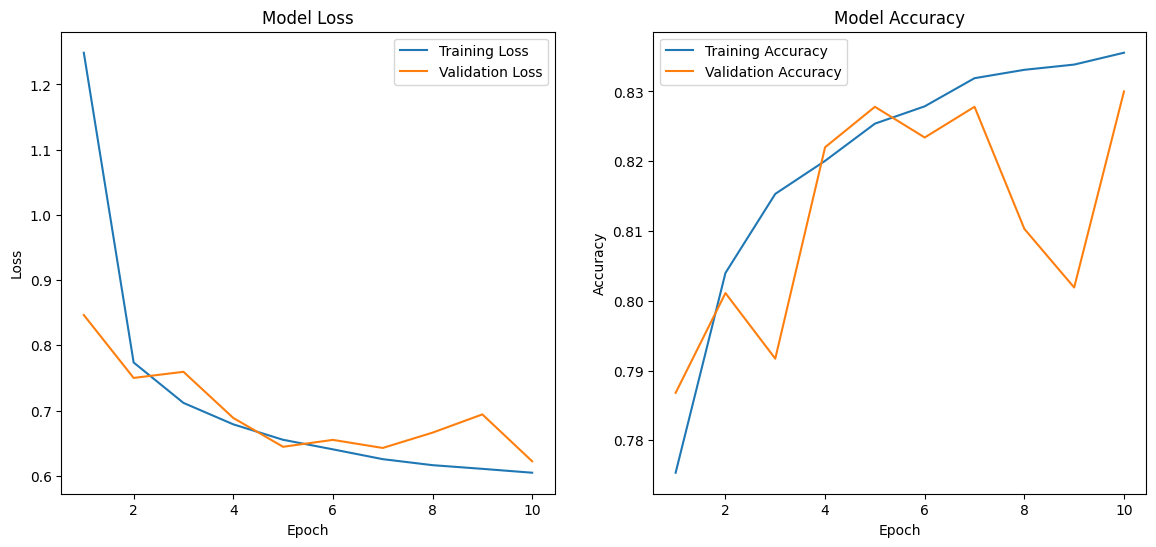

In [21]:
plot_training_history(history,epochs=10)

## Optimizers - SGD, RMSProp, Adam

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 - 11s - 6ms/step - accuracy: 0.7085 - loss: 0.9727 - val_accuracy: 0.7992 - val_loss: 0.7131
Epoch 2/10
1875/1875 - 12s - 7ms/step - accuracy: 0.7463 - loss: 0.8605 - val_accuracy: 0.7718 - val_loss: 0.8163
Epoch 3/10
1875/1875 - 12s - 6ms/step - accuracy: 0.7493 - loss: 0.8707 - val_accuracy: 0.7513 - val_loss: 0.8640
Epoch 4/10
1875/1875 - 20s - 11ms/step - accuracy: 0.7436 - loss: 0.8899 - val_accuracy: 0.7747 - val_loss: 0.7986
Epoch 5/10
1875/1875 - 15s - 8ms/step - accuracy: 0.7440 - loss: 0.9048 - val_accuracy: 0.6103 - val_loss: 1.8340
Epoch 6/10
1875/1875 - 21s - 11ms/step - accuracy: 0.7438 - loss: 0.9115 - val_accuracy: 0.7758 - val_loss: 0.8141
Epoch 7/10
1875/1875 - 15s - 8ms/step - accuracy: 0.7386 - loss: 0.9434 - val_accuracy: 0.7397 - val_loss: 0.8585
Epoch 8/10
1875/1875 - 17s - 9ms/step - accuracy: 0.7409 - loss: 0.9100 - val_accuracy: 0.7518 - val_loss: 0.8180
Epoch 9/10
1875/1875 - 18s - 10ms/step - accuracy: 0.7432 - loss: 0.9003 - val_accurac

AttributeError: 'dict' object has no attribute 'history'

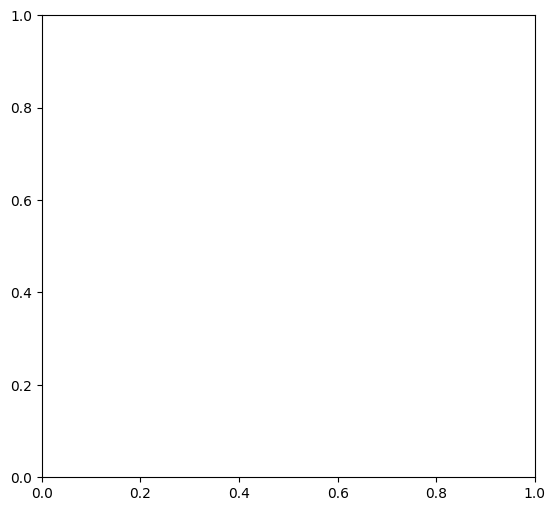

In [ ]:
from tensorflow.keras.regularizers import L1, L2, l1_l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
# define model
model = Sequential()
# Input Layer
model.add(Input(shape=(X_train_scaled.shape[1],)))
# Hidden Layer1
model.add(Dense(units=256,activation="relu", kernel_regularizer=L2(l2=0.01)))
# Hidden Layer2
model.add(Dense(units=128,activation="relu"))
# Hidden Layer3
model.add(Dense(units=64,activation="relu"))
# Output Layer
model.add(Dense(units=number_of_classes,activation="softmax"))
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer = RMSprop(learning_rate=0.005), 
              metrics =['accuracy'])
# Check summary
model.summary()
# train the model
history = model.fit(X_train_scaled,y_train, epochs= 10, batch_size = 32,
                   validation_data = (X_test_scaled,y_test),verbose=2) 


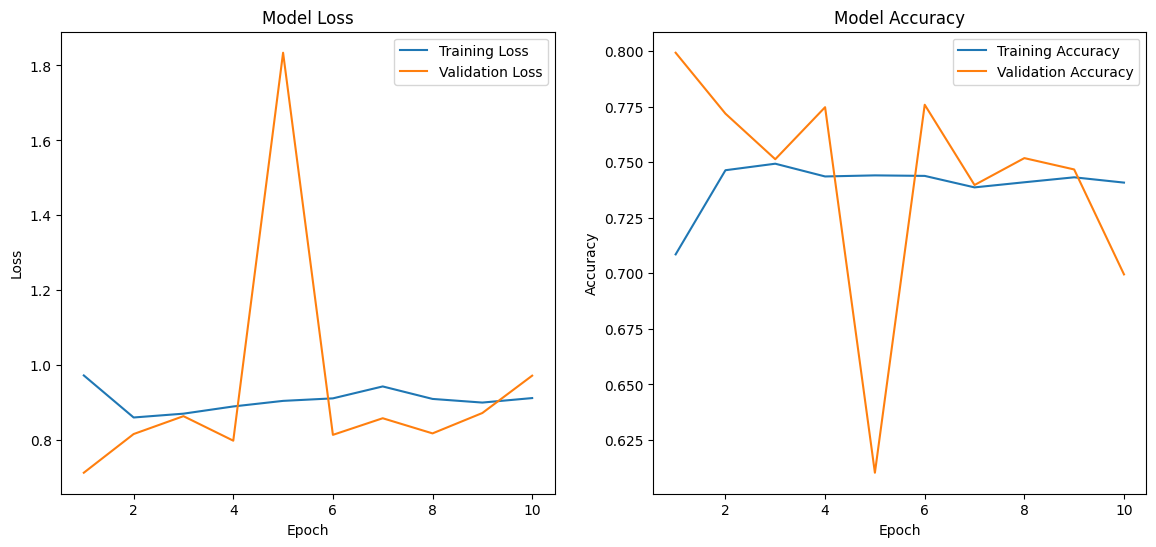

In [24]:
plot_training_history(history,epochs=10)

## Reducing Learrning Rate on plateau

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 - 13s - 7ms/step - accuracy: 0.6945 - loss: 1.0311 - val_accuracy: 0.7511 - val_loss: 0.8104 - learning_rate: 0.0050
Epoch 2/10
1875/1875 - 13s - 7ms/step - accuracy: 0.7387 - loss: 0.8797 - val_accuracy: 0.7463 - val_loss: 0.8369 - learning_rate: 0.0050
Epoch 3/10
1875/1875 - 28s - 15ms/step - accuracy: 0.7438 - loss: 0.8726 - val_accuracy: 0.7656 - val_loss: 0.7897 - learning_rate: 0.0050
Epoch 4/10
1875/1875 - 22s - 12ms/step - accuracy: 0.7465 - loss: 0.8785 - val_accuracy: 0.7829 - val_loss: 0.8346 - learning_rate: 0.0050
Epoch 5/10

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
1875/1875 - 24s - 13ms/step - accuracy: 0.7437 - loss: 0.9015 - val_accuracy: 0.6595 - val_loss: 1.0821 - learning_rate: 0.0050
Epoch 6/10
1875/1875 - 21s - 11ms/step - accuracy: 0.7929 - loss: 0.6899 - val_accuracy: 0.7881 - val_loss: 0.6917 - learning_rate: 0.0025
Epoch 7/10
1875/1875 - 22s - 12ms/step - accuracy: 0.7930 - loss: 0.6869 - val_accuracy: 0.

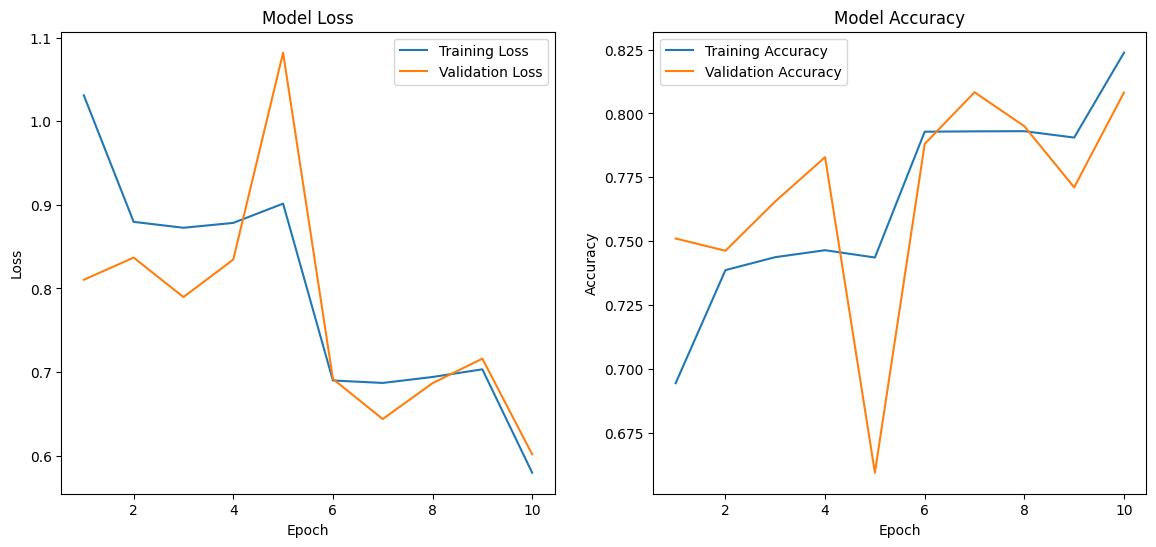

In [25]:

from tensorflow.keras.regularizers import L1, L2, l1_l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau
# define model
model = Sequential()
# Input Layer
model.add(Input(shape=(X_train_scaled.shape[1],)))
# Hidden Layer1
model.add(Dense(units=256,activation="relu", kernel_regularizer=L2(l2=0.01)))
# Hidden Layer2
model.add(Dense(units=128,activation="relu"))
# Hidden Layer3
model.add(Dense(units=64,activation="relu"))
# Output Layer
model.add(Dense(units=number_of_classes,activation="softmax"))
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer = RMSprop(learning_rate=0.005), 
              metrics =['accuracy'])
# Check summary
model.summary()

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# train the model
history = model.fit(X_train_scaled,y_train, epochs= 10, batch_size = 32,
                   validation_data = (X_test_scaled,y_test),verbose=2, callbacks=[reduce_lr]) 



plot_training_history(history,epochs=10)

